In [1]:
# allow plots to be interactive in the notebook
%matplotlib notebook

import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime

import os 
import sys
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [6]:
inpath ='/cluster/work/users/rheinlender/breakup2013/outputs/breakup2013.ERA5.r10_20130101/'
outpath_plots = '/cluster/work/users/rheinlender/plots/'

fl = sorted(glob(inpath+'Moorings*.nc'))
print('Opening files: ', *fl, sep = "\n") 
# Open multiple nc files
ds = xr.open_mfdataset(fl, concat_dim='time')

# Select data in Jan-Mar
subset = ds.sel(time=slice('2013-01-01', '2013-03-31'))

# compute daily average SIT from 3-hour interval 
sit_daily = subset.sit.groupby('time.dayofyear').mean(skipna=True)

# get daily time array
date=subset['time'].groupby('time.dayofyear').mean()

# get folder name
prefix = os.path.basename(os.path.normpath(inpath))
print(prefix)

subset

Opening files: 
/cluster/work/users/rheinlender/breakup2013/outputs/breakup2013.ERA5.r10_20130101/Moorings_2013m01.nc
/cluster/work/users/rheinlender/breakup2013/outputs/breakup2013.ERA5.r10_20130101/Moorings_2013m02.nc
/cluster/work/users/rheinlender/breakup2013/outputs/breakup2013.ERA5.r10_20130101/Moorings_2013m03.nc
breakup2013.ERA5.r10_20130101


<xarray.Dataset>
Dimensions:                   (nv: 2, time: 180, x: 782, y: 651)
Coordinates:
  * time                      (time) datetime64[ns] 2013-01-01T06:00:00 ... 2...
Dimensions without coordinates: nv, x, y
Data variables:
    Polar_Stereographic_Grid  (time) int32 -2147483647 ... -2147483647
    time_bnds                 (time, nv) datetime64[ns] dask.array<chunksize=(62, 2), meta=np.ndarray>
    longitude                 (time, y, x) float32 dask.array<chunksize=(62, 651, 782), meta=np.ndarray>
    latitude                  (time, y, x) float32 dask.array<chunksize=(62, 651, 782), meta=np.ndarray>
    siu                       (time, y, x) float32 dask.array<chunksize=(62, 651, 782), meta=np.ndarray>
    siv                       (time, y, x) float32 dask.array<chunksize=(62, 651, 782), meta=np.ndarray>
    sic                       (time, y, x) float32 dask.array<chunksize=(62, 651, 782), meta=np.ndarray>
    sit                       (time, y, x) float32 dask.array<chunksize=(62, 651, 782), meta=np.ndarray>
    snt                       (time, y, x) float32 dask.array<chunksize=(62, 651, 782), meta=np.ndarray>
    fyi_fraction              (time, y, x) float32 dask.array<chunksize=(62, 651, 782), meta=np.ndarray>
    sit_thin                  (time, y, x) float32 dask.array<chunksize=(62, 651, 782), meta=np.ndarray>
    hfos                      (time, y, x) float32 dask.array<chunksize=(62, 651, 782), meta=np.ndarray>
    hfs                       (time, y, x) float32 dask.array<chunksize=(62, 651, 782), meta=np.ndarray>
    sia                       (time, y, x) float32 dask.array<chunksize=(62, 651, 782), meta=np.ndarray>
    sfo                       (time, y, x) float32 dask.array<chunksize=(62, 651, 782), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    institution:  NERSC, Thormoehlens gate 47, N-5006 Bergen, Norway
    source:       neXtSIM model fields

In [23]:
# create animation of sea ice thickness

import matplotlib.animation as animation
from IPython.display import HTML, Image
import cartopy.crs as ccrs


outpath_plots = '/cluster/work/users/rheinlender/plots/'

def make_figure():
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1, 1, 1)  

    return fig, ax

fig, ax = make_figure();

frames = len(date)        # Number of frames
#frames = 2        # Number of frames

# contour levels
clevs = np.arange(0.,3.2,0.2)

def draw(frame):
    var = sit_daily[frame].values
    im = ax.contourf(ds.x, ds.y, sit_daily[frame], clevs, extend='max',
                     add_colorbar=False,
                    )
    title = u"%s — %s" % (ds.sit.long_name, str(date[frame].values)[:10])
    ax.set_title(title)

    return im

def init():
    im = ax.contourf(ds.x, ds.y, sit_daily[0], clevs, extend='max',
                     #add_colorbar=True,
                    )
    title = u"%s — %s" % (ds.sit.long_name, str(date[0].values)[:10])
    ax.set_title(title)
    
    add_colorbar(fig, ax, im)
    
    return im 

def add_colorbar(fig, ax, im):
    return fig.colorbar(im, ax=ax, label='[m]')

def animate(frame):
   # ax.clear()
    ax.collections = []  
    return draw(frame)

ani = animation.FuncAnimation(fig, animate, frames, interval=0.01, blit=False,
                              init_func=init, repeat=False)

writer = animation.writers['imagemagick']
writer = writer(fps=3)
                
figname = outpath_plots+'sit_Jan-Mar_' + prefix + '.gif' 
ani.save(figname , writer=writer);

plt.close(fig)



<IPython.core.display.Javascript object>

/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide

/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
/c

/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide

/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/c

/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
/c

/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide

/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/c

In [15]:

writer = animation.writers.avail
writer




/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The avail attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  """Entry point for launching an IPython kernel.


{'pillow': matplotlib.animation.PillowWriter,
 'imagemagick': matplotlib.animation.ImageMagickWriter,
 'imagemagick_file': matplotlib.animation.ImageMagickFileWriter,
 'html': matplotlib.animation.HTMLWriter}

<IPython.core.display.Javascript object>


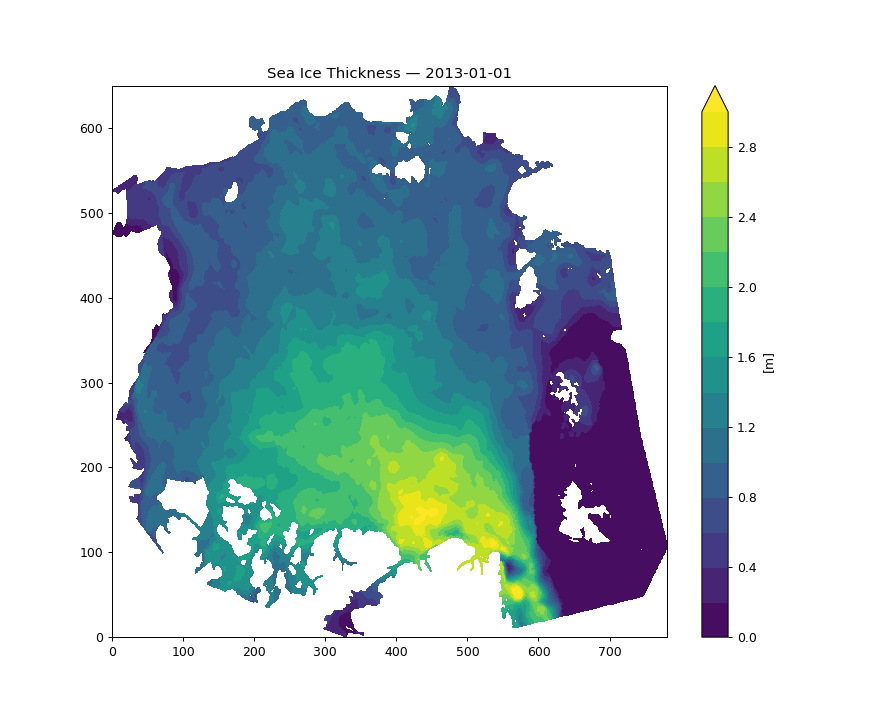

/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [22]:

fig, ax  = make_figure();
init()